Making the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

immo = pd.read_csv("../data/_data_clean_to_model.csv", index_col='id')
display(immo.head())
display(immo.shape)

,price,floor,bedroomCount,netHabitableSurface,constructionYear,facadeCount,floorCount,hasLift,hasGarden,gardenSurface,...,A,A+,A++,B,C,D,E,F,G,NO_EPC_SCORE
id,,,,,,,,,,,,,,,,,,,,,
10616910,399000,1.0,2.0,125.0,2013.0,1.0,1.0,1,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616911,423000,2.0,3.0,155.0,2014.0,4.0,3.0,1,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616934,169000,0.0,1.0,54.0,1850.0,2.0,2.0,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616833,275000,1.0,1.0,66.0,2025.0,3.0,3.0,1,0,0.0,...,1,0,0,0,0,0,0,0,0,0
10616966,185000,3.0,2.0,74.0,1975.0,1.0,3.0,0,0,0.0,...,0,0,0,0,1,0,0,0,0,0


(10540, 89)

In [2]:
X = pd.DataFrame(immo.drop(columns=['price', 'gardenSurface', 'terraceSurface', 'floor']))
y = np.array(immo.price).reshape(-1, 1)#target

print(X.shape)
print(y.shape)

(10540, 85)
(10540, 1)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

scalar = StandardScaler()

normalized_x_train = np.array(pd.DataFrame(
    scalar.fit_transform(X_train),
    columns = X_train.columns
))

normalized_x_test = np.array(pd.DataFrame(
    scalar.transform(X_test),
    columns = X_test.columns
))

print(normalized_x_train.shape); print(normalized_x_test.shape)



(7378, 85)
(3162, 85)


In [16]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(normalized_x_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# training predition 
pred_train_tree= dtree.predict(normalized_x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

# text predition
pred_test_tree= dtree.predict(normalized_x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))

357680.3042428222
0.23970366052027847
355460.149062269
0.21583749493361715


In [18]:
# Code Lines 1 to 4: Fit the regression tree 'dtree1' and 'dtree2' 
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(normalized_x_train, y_train)
dtree2.fit(normalized_x_train, y_train)

# Code Lines 5 to 6: Predict on training data
tr1 = dtree1.predict(normalized_x_train)
tr2 = dtree2.predict(normalized_x_train) 

#Code Lines 7 to 8: Predict on testing data
y1 = dtree1.predict(normalized_x_test)
y2 = dtree2.predict(normalized_x_test) 

In [19]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1))) 
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1))) 
print(r2_score(y_test, y1))

323613.24940716004
0.3776346069766824
331300.8066453608
0.3188084973914188


In [20]:
# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print(np.sqrt(mean_squared_error(y_train,tr2))) 
print(r2_score(y_train, tr2))

# Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print(np.sqrt(mean_squared_error(y_test,y2))) 
print(r2_score(y_test, y2)) 

242222.71918508832
0.6513235646396951
305663.81222635007
0.4201545070134566


# Random Forest (or Bootstrap Aggregation)

In [24]:
from sklearn.ensemble import RandomForestRegressor

#RF model
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

d:\Cesar\BeCode\Projects\linear_regression-Cesar\linear_regression-cesar_env\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


91642.45595207531
0.950090147555213
230906.55052415308
0.6691000190520817


<Axes: >

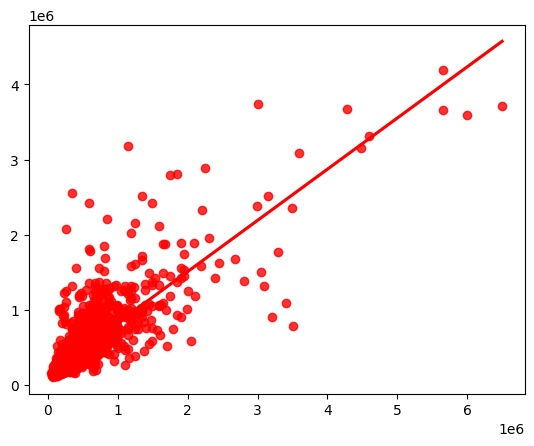

In [22]:
sns.regplot(x=y_test,y=pred_test_rf,ci=None,color ='red')